In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from matplotlib.colors import ListedColormap

In [58]:
file_path = 'E:/UNCC/UNCC ML/diabetes.csv'
sample = pd.DataFrame(pd.read_csv(file_path))
sample.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [59]:
X = sample.iloc[:, 0:8].values
Y = sample.iloc[:, 8].values

In [60]:
print(X[:3])

[[  6.    148.     72.     35.      0.     33.6     0.627  50.   ]
 [  1.     85.     66.     29.      0.     26.6     0.351  31.   ]
 [  8.    183.     64.      0.      0.     23.3     0.672  32.   ]]


In [61]:
print(Y[:3])

[1 0 1]


In [62]:
# Splitting the data samples 80% train data and 20% test data.

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2, random_state = 0)

In [63]:
# We chose to scale after split as we want the outputs to be unscaled.

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test) # we use the same SD and Mean for both scaling.

In [64]:
# Logistic regression.
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(random_state=0)
reg.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [65]:
y_pred = reg.predict(x_test)
print(y_pred[0:3])

[1 0 0]


In [66]:
#Checking the Confusion Matrix

from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[98,  9],
       [18, 29]], dtype=int64)

In [67]:
#Using "sklearn" library to check accuracy, precision, recall and F1 Score.

from sklearn import metrics
print("Accuracy: %.3f %%" %(metrics.accuracy_score(y_test, y_pred)*100))
print("Precision: %.3f %%" %(metrics.precision_score(y_test, y_pred)*100))
print("Recall: %.3f %%" %(metrics.recall_score(y_test, y_pred)*100))
print("F1 Score: %.3f %%" %(metrics.f1_score(y_test, y_pred, average='micro')*100)) # Global F1 score

Accuracy: 82.468 %
Precision: 76.316 %
Recall: 61.702 %
F1 Score: 82.468 %


Text(0.5, 427.9555555555555, 'Predicted label')

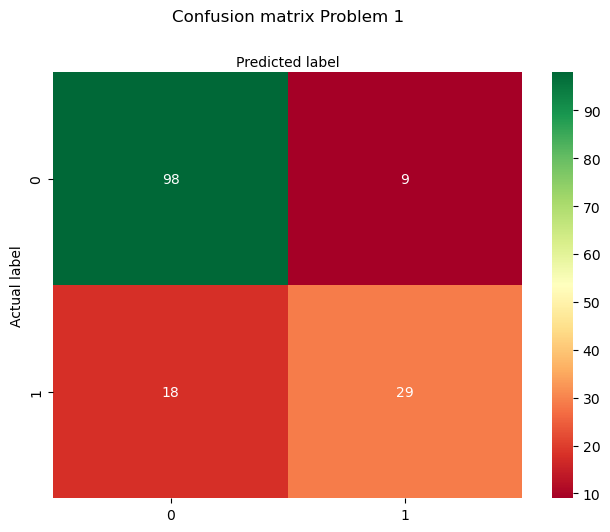

In [83]:
# Plotting the confusion matrix.
class_names = [0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion), annot=True, cmap="RdYlGn" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Problem 1', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [69]:
# Report of individual accuracy, precision, recall and F1 Score.
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.62      0.68        47

    accuracy                           0.82       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.82      0.82      0.82       154

